## Video game sales analysis and visualization
![](https://onlysp.escapistmagazine.com/wp-content/uploads/2018/09/Dangerous-Driving-2.gif)

## About dataset:

- Rank - Ranking of overall sales, integer

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.), object

- Year - Year of the game's release, float

- Genre - Genre of the game ,object

- Publisher - Publisher of the game, object

- NA_Sales - Sales in North America (in millions), float

- EU_Sales - Sales in Europe (in millions), float

- JP_Sales - Sales in Japan (in millions), float

- Other_Sales - Sales in the rest of the world (in millions), float

- Global_Sales - Total worldwide sales, float

# Import libraries

In [1]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport
from collections import Counter

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("input"))

['.DS_Store', 'vgsales.csv']


## Import Data
First of all to perform the analysis, we have to import the data:

In [2]:
#import dataset

data = pd.read_csv("input/vgsales.csv")
data.head(10)

Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

In [3]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
#rows and columns
data.shape

(16598, 11)

Befor EDA, let us get some descriptive statistics about the data

In [5]:
# Some statistical analysis of our data
data.describe()
# this gives count, mean, avg etc of all columns containing numerical values

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [6]:
# Displays the type of values each column in dataset like if the column has float, int, object values,etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Exploratory Data Analysis

Let's look at the platforms of different video games

In [7]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
# The most popular games from the company Electronic Arts'
Publisher_get = data.groupby(['Publisher'])
Publisher_get.get_group('Electronic Arts')

Rank                          Name Platform    Year       Genre  \
77        78                       FIFA 16      PS4  2015.0      Sports   
82        83                FIFA Soccer 13      PS3  2012.0      Action   
83        84                    The Sims 3       PC  2009.0  Simulation   
92        93  Star Wars Battlefront (2015)      PS4  2015.0     Shooter   
99       100                 Battlefield 3     X360  2011.0     Shooter   
...      ...                           ...      ...     ...         ...   
16339  16342    Command & Conquer Renegade       PC  2002.0     Shooter   
16384  16387             Poker for Dummies       PC  2008.0        Misc   
16413  16416      The Godfather (JP sales)     X360  2006.0      Action   
16539  16542     Spore Galactic Adventures       PC  2009.0    Strategy   
16554  16557             Psychic Detective       PS  1995.0   Adventure   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
77     Electronic Arts      1.11      6.06      0.06         1.26   
82     Electronic Arts      1.06      5.05      0.13         2.01   
83     Electronic Arts      0.98      6.42      0.00         0.71   
92     Electronic Arts      2.93      3.29      0.22         1.23   
99     Electronic Arts      4.46      2.13      0.06         0.69   
...                ...       ...       ...       ...          ...   
16339  Electronic Arts      0.00      0.01      0.00         0.00   
16384  Electronic Arts      0.00      0.01      0.00         0.00   
16413  Electronic Arts      0.00      0.00      0.01         0.00   
16539  Electronic Arts      0.00      0.01      0.00         0.00   
16554  Electronic Arts      0.01      0.00      0.00         0.00   

       Global_Sales  
77             8.49  
82             8.24  
83             8.11  
92             7.67  
99             7.34  
...             ...  
16339          0.01  
16384          0.01  
16413          0.01  
16539          0.01  
16554          0.01  

[1351 rows x 11 columns]

In [9]:
# The most popular games from the company Nintendo
Publisher_get = data.groupby(['Publisher'])
Publisher_get.get_group('Nintendo')

Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                           Pokemon Red/Pokemon Blue       GB   
...      ...                                                ...      ...   
16269  16272                           Slide Adventure: Mag Kid       DS   
16357  16360               Mario vs. Donkey Kong: Tipping Stars     WiiU   
16456  16459                           Art Academy: Home Studio     WiiU   
16473  16476                                    Captain Rainbow      Wii   
16542  16545  Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS   

         Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports  Nintendo     41.49     29.02      3.77   
1      1985.0      Platform  Nintendo     29.08      3.58      6.81   
2      2008.0        Racing  Nintendo     15.85     12.88      3.79   
3      2009.0        Sports  Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing  Nintendo     11.27      8.89     10.22   
...       ...           ...       ...       ...       ...       ...   
16269  2007.0        Action  Nintendo      0.00      0.00      0.01   
16357  2015.0        Puzzle  Nintendo      0.00      0.00      0.01   
16456  2015.0          Misc  Nintendo      0.00      0.00      0.01   
16473  2008.0     Adventure  Nintendo      0.00      0.00      0.01   
16542  2015.0          Misc  Nintendo      0.00      0.00      0.01   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16269         0.00          0.01  
16357         0.00          0.01  
16456         0.00          0.01  
16473         0.00          0.01  
16542         0.00          0.01  

[703 rows x 11 columns]

In [10]:
sns.pairplot(data)

Let's look at the platforms of different video games

In [11]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

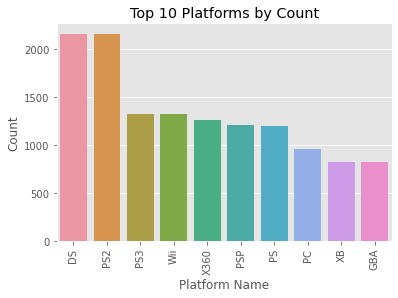

In [12]:
# Make a Bar plot of 10 most common Platforms
platform = Counter(data['Platform'].tolist()).most_common(10)
names = [x[0] for x in platform]
counts = [x[1] for x in platform]

plt.style.use("ggplot")
sns.barplot(x=names, y=counts)
plt.title("Top 10 Platforms by Count")
plt.xlabel("Platform Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Now let's look at the game genre

In [13]:
data["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

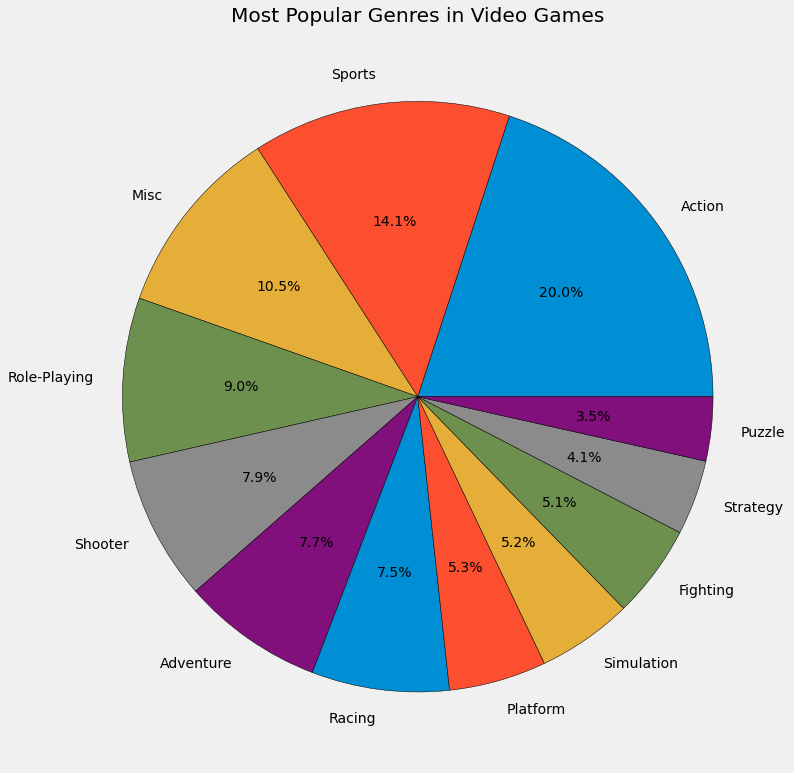

In [14]:
# Make a pie plot of 12 most common Genre
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(11,11))
plt.pie(list(data['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Most Popular Genres in Video Games')
plt.tight_layout()
plt.show()

Let's look at the top Publishers of Video Game titles

In [15]:
data["Publisher"].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Altron                             1
TechnoSoft                         1
Seventh Chord                      1
King Records                       1
Game Arts                          1
Name: Publisher, Length: 578, dtype: int64

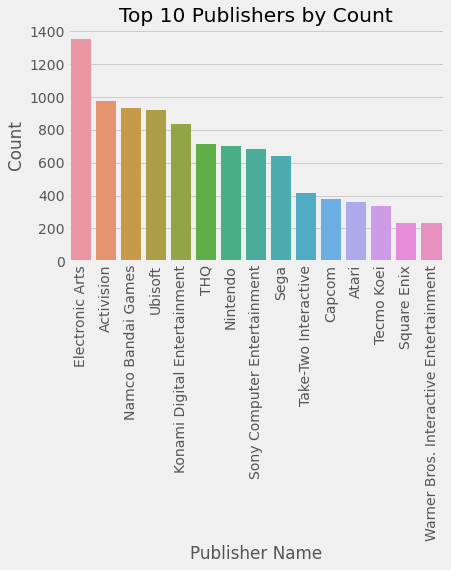

In [16]:
# Make a Bar plot of 10 most common Platforms
publisher = Counter(data['Publisher'].tolist()).most_common(15)
names = [x[0] for x in publisher]
counts = [x[1] for x in publisher]

plt.style.use("fivethirtyeight")
sns.barplot(x=names, y=counts)
plt.title("Top 10 Publishers by Count")
plt.xlabel("Publisher Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

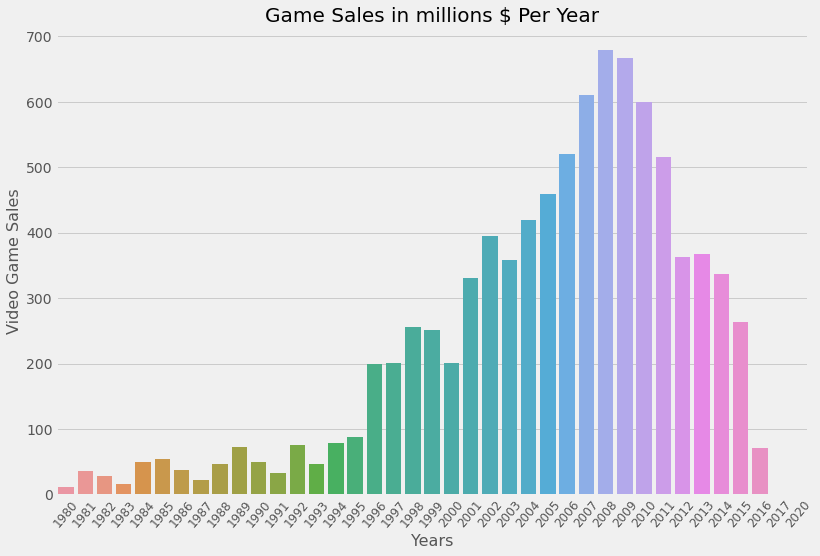

In [17]:
y = data.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Video Game Sales', fontsize=16)
ax.set_title(label='Game Sales in millions $ Per Year', fontsize=20)
plt.show();

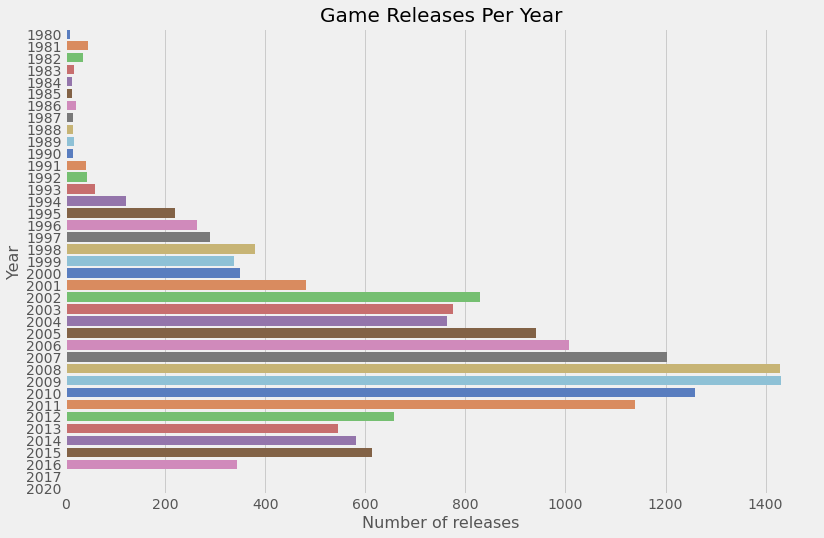

In [18]:
x = data.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

# Sales
Let's now look at the sales columns in the dataset and compare it's effect on others.

## Note:
These 4 Sales Columns (NA,EU,JP,Other,Global) sales, are in millions.

In [19]:
# Make a dataframe with Publishers arranged by Sales values
publisher_list = data['Publisher'].unique()
na_rev, eu_rev, jp_rev, ot_rev, gb_rev = [], [], [], [], []

for pub in publisher_list:
    na_rev.append(data[data['Publisher'] == pub]['NA_Sales'].sum())
    eu_rev.append(data[data['Publisher'] == pub]['EU_Sales'].sum())
    jp_rev.append(data[data['Publisher'] == pub]['JP_Sales'].sum())
    ot_rev.append(data[data['Publisher'] == pub]['Other_Sales'].sum())
    gb_rev.append(data[data['Publisher'] == pub]['Global_Sales'].sum())
    
publisher_rev = pd.DataFrame({
    'pub': publisher_list,
    'na': na_rev,
    'eu': eu_rev,
    'jp': jp_rev,
    'ot': ot_rev,
    'gb': gb_rev
})

publisher_rev.head()

pub      na      eu      jp     ot       gb
0                     Nintendo  816.87  418.74  455.42  95.33  1786.56
1       Microsoft Game Studios  155.35   68.61    3.26  18.56   245.79
2         Take-Two Interactive  220.49  118.14    5.83  55.24   399.54
3  Sony Computer Entertainment  265.22  187.72   74.10  80.45   607.50
4                   Activision  429.70  215.53    6.54  75.34   727.46

In [20]:
# Make a dataframe with Genre arranged by Sales values
genre_list = data['Genre'].unique()
na_rev, eu_rev, jp_rev, ot_rev, gb_rev = [], [], [], [], []

for gen in genre_list:
    na_rev.append(data[data['Genre'] == gen]['NA_Sales'].sum())
    eu_rev.append(data[data['Genre'] == gen]['EU_Sales'].sum())
    jp_rev.append(data[data['Genre'] == gen]['JP_Sales'].sum())
    ot_rev.append(data[data['Genre'] == gen]['Other_Sales'].sum())
    gb_rev.append(data[data['Genre'] == gen]['Global_Sales'].sum())
    
genre_rev = pd.DataFrame({
    'genre': genre_list,
    'na': na_rev,
    'eu': eu_rev,
    'jp': jp_rev,
    'ot': ot_rev,
    'gb': gb_rev
})

genre_rev.head()

genre      na      eu      jp      ot       gb
0        Sports  683.35  376.85  135.37  134.97  1330.93
1      Platform  447.05  201.63  130.77   51.59   831.37
2        Racing  359.42  238.39   56.69   77.27   732.04
3  Role-Playing  327.28  188.06  352.31   59.61   927.37
4        Puzzle  123.78   50.78   57.31   12.55   244.95

In [21]:
# Make a dataframe with Platforms arranged by Sales values
plt_list = data['Platform'].unique()
na_rev, eu_rev, jp_rev, ot_rev, gb_rev = [], [], [], [], []

for pl in plt_list:
    na_rev.append(data[data['Platform'] == pl]['NA_Sales'].sum())
    eu_rev.append(data[data['Platform'] == pl]['EU_Sales'].sum())
    jp_rev.append(data[data['Platform'] == pl]['JP_Sales'].sum())
    ot_rev.append(data[data['Platform'] == pl]['Other_Sales'].sum())
    gb_rev.append(data[data['Platform'] == pl]['Global_Sales'].sum())
    
plt_rev = pd.DataFrame({
    'platform': plt_list,
    'na': na_rev,
    'eu': eu_rev,
    'jp': jp_rev,
    'ot': ot_rev,
    'gb': gb_rev
})

plt_rev.head()

platform      na      eu      jp     ot      gb
0      Wii  507.71  268.38   69.35  80.61  926.71
1      NES  125.94   21.15   98.65   5.31  251.07
2       GB  114.32   47.82   85.12   8.20  255.45
3       DS  390.71  194.65  175.57  60.53  822.49
4     X360  601.05  280.58   12.43  85.54  979.96

## Sales in North America
Let's start by lookingpublisher_rev at the sales of video game titles in North America

In [22]:
print(f"Average Year: {data['NA_Sales'].mean():.2f} Million")
print(f"75th Quantile of Column Year: {np.quantile(data['NA_Sales'], 0.75):.2f} Million")
print(f"99th Quantile of Column Year: {np.quantile(data['NA_Sales'], 0.99):.2f} Million")

Average Year: 0.26 Million
75th Quantile of Column Year: 0.24 Million
99th Quantile of Column Year: 2.80 Million


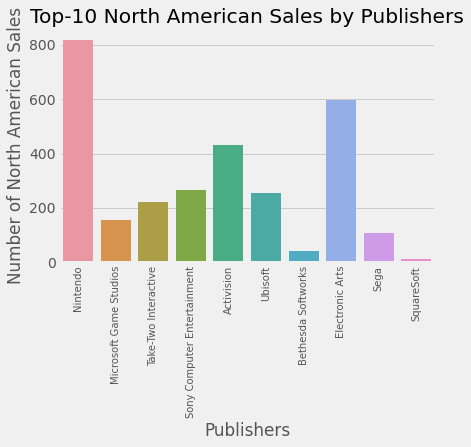

In [23]:
# Let's make a barplot of Top-10 Publishers by NA Sales 
plt.style.use("fast")
sns.barplot(data=publisher_rev[:10], x='pub', y='na')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Publishers")
plt.ylabel("Number of North American Sales")
plt.title("Top-10 North American Sales by Publishers")
plt.show()

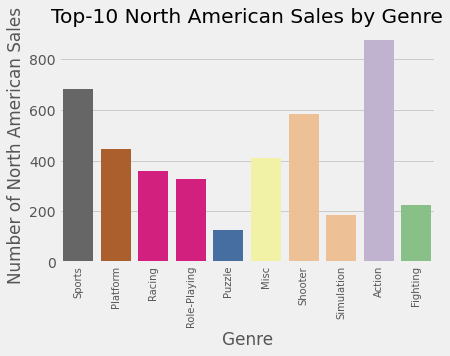

In [24]:
# Let's make a barplot of Top-10 Genre by NA Sales 
plt.style.use("fast")
sns.barplot(data=genre_rev[:10], x='genre', y='na', palette='Accent_r')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Genre")
plt.ylabel("Number of North American Sales")
plt.title("Top-10 North American Sales by Genre")
plt.show()

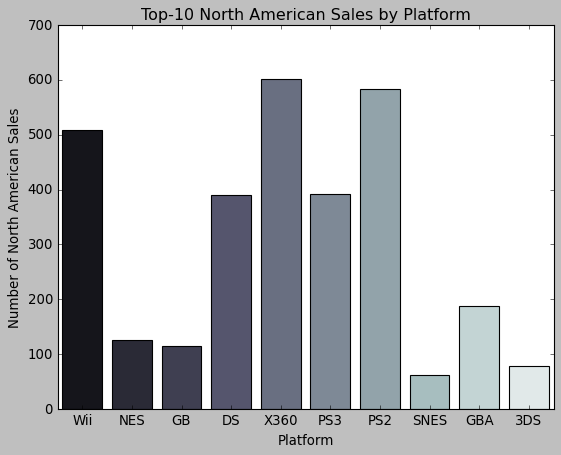

In [25]:
# Let's make a barplot of Top-10 Platforms by NA Sales 
plt.style.use("classic")
sns.barplot(data=plt_rev[:10], x='platform', y='na', palette='bone')
plt.xticks(fontsize=12)
plt.xlabel("Platform")
plt.ylabel("Number of North American Sales")
plt.title("Top-10 North American Sales by Platform")
plt.show()

## Sales in European Union

In [26]:
print(f"Average Year: {data['EU_Sales'].mean():.2f} Million")
print(f"75th Quantile of Column Year: {np.quantile(data['EU_Sales'], 0.75):.2f} Million")
print(f"99th Quantile of Column Year: {np.quantile(data['EU_Sales'], 0.99):.2f} Million")

Average Year: 0.15 Million
75th Quantile of Column Year: 0.11 Million
99th Quantile of Column Year: 1.94 Million


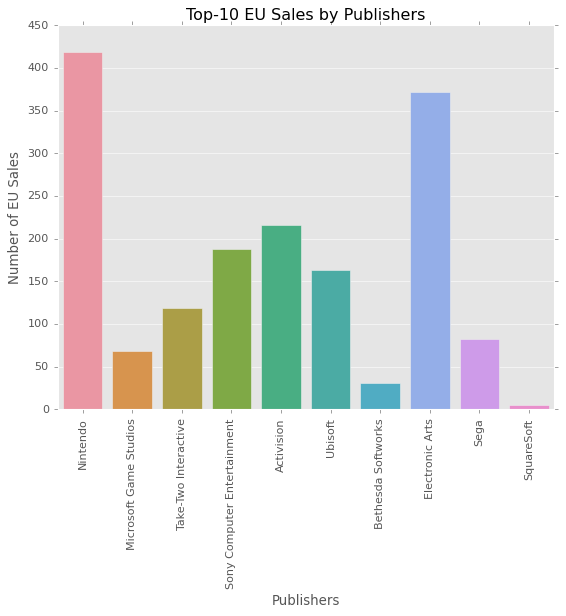

In [27]:
# Let's make a barplot of Top-10 Publishers by EU Sales 
plt.style.use("ggplot")
sns.barplot(data=publisher_rev[:10], x='pub', y='eu')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Publishers")
plt.ylabel("Number of EU Sales")
plt.title("Top-10 EU Sales by Publishers")
plt.show()

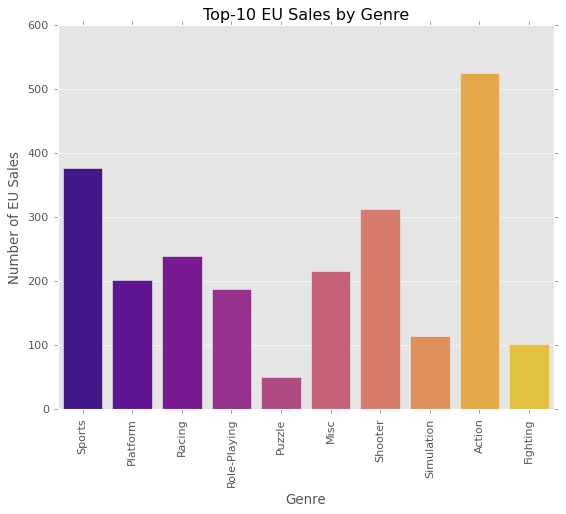

In [28]:
# Let's make a barplot of Top-10 Genre by EU Sales 
plt.style.use("fast")
sns.barplot(data=genre_rev[:10], x='genre', y='eu', palette='plasma')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Genre")
plt.ylabel("Number of EU Sales")
plt.title("Top-10 EU Sales by Genre")
plt.show()

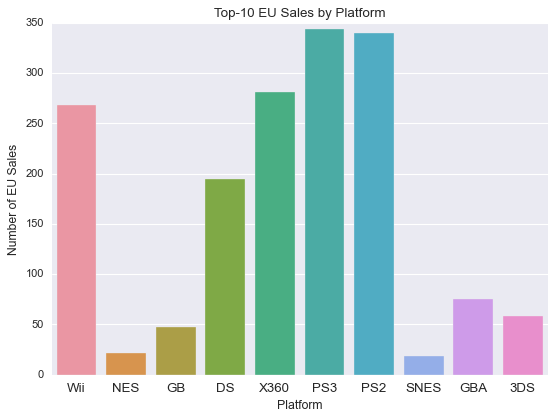

In [29]:
# Let's make a barplot of Top-10 Platforms by EU Sales 
plt.style.use("seaborn")
sns.barplot(data=plt_rev[:10], x='platform', y='eu')
plt.xticks(fontsize=12)
plt.xlabel("Platform")
plt.ylabel("Number of EU Sales")
plt.title("Top-10 EU Sales by Platform")
plt.show()

## Global Sales
Let's skip directly to Global Sales and look more into it.

In [30]:
print(f"Average Year: {data['Global_Sales'].mean():.2f} Million")
print(f"75th Quantile of Column Year: {np.quantile(data['Global_Sales'], 0.75):.2f} Million")
print(f"99th Quantile of Column Year: {np.quantile(data['Global_Sales'], 0.99):.2f} Million")

Average Year: 0.54 Million
75th Quantile of Column Year: 0.47 Million
99th Quantile of Column Year: 5.43 Million


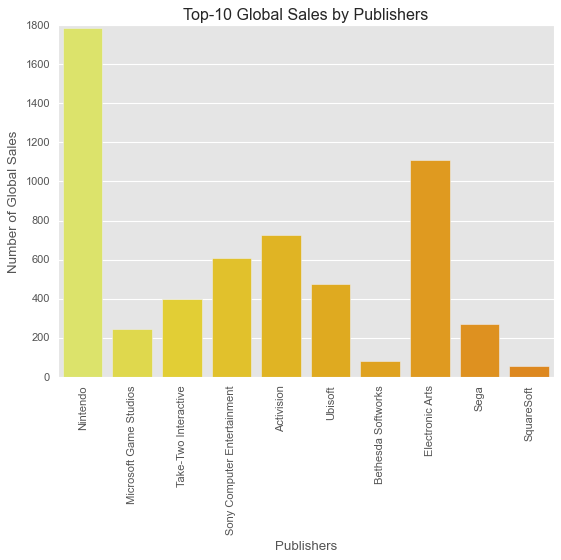

In [31]:
# Let's make a barplot of Top-10 Publishers by Global Sales
plt.style.use("ggplot")
sns.barplot(data=publisher_rev[:10], x='pub', y='gb', palette='Wistia')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Publishers")
plt.ylabel("Number of Global Sales")
plt.title("Top-10 Global Sales by Publishers")
plt.show()

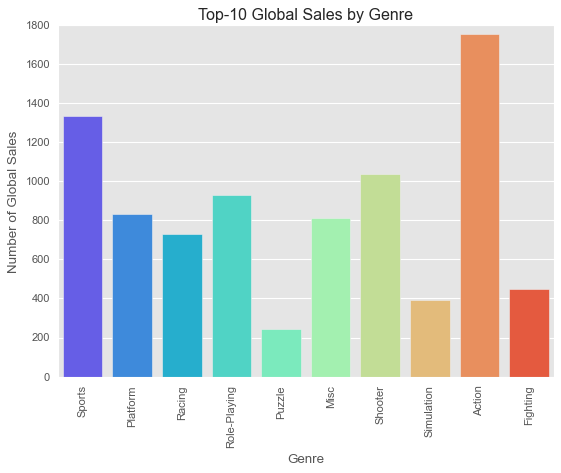

In [32]:
# Let's make a barplot of Top-10 Genre by Global Sales 
plt.style.use("fast")
sns.barplot(data=genre_rev[:10], x='genre', y='gb', palette='rainbow')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Genre")
plt.ylabel("Number of Global Sales")
plt.title("Top-10 Global Sales by Genre")
plt.show()

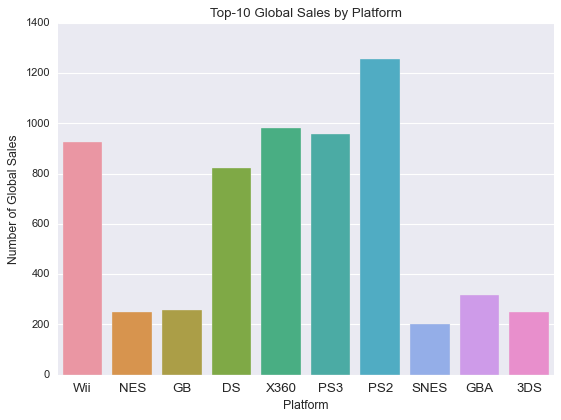

In [33]:
# Let's make a barplot of Top-10 Platforms by EU Sales 
plt.style.use("seaborn")
sns.barplot(data=plt_rev[:10], x='platform', y='gb')
plt.xticks(fontsize=12)
plt.xlabel("Platform")
plt.ylabel("Number of Global Sales")
plt.title("Top-10 Global Sales by Platform")
plt.show()

## Video Games
Let's take a look at Most Common Video Games in different markets

In [34]:
# Make a list of Top-10 Games by revenue in North America
top10na = data['NA_Sales'][:10]
top10gamesna = []
for pr in top10na:
    top10gamesna.append(data[data['NA_Sales'] == pr]['Name'].tolist()[0])

print(f"Top-10 Games by North American Sales are:\n{top10gamesna}")

Top-10 Games by North American Sales are:
['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt']


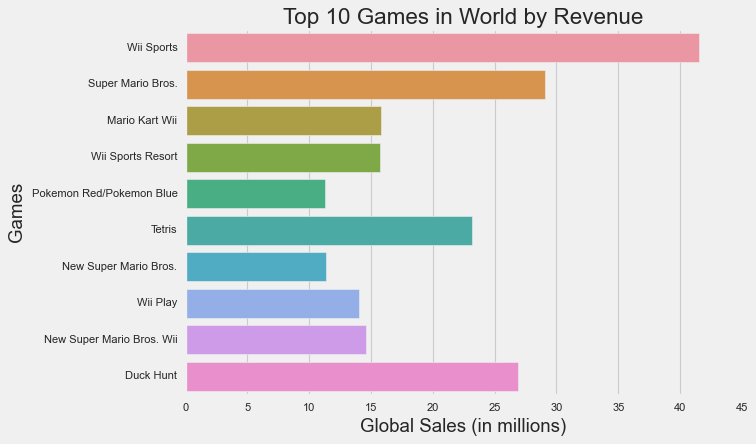

In [35]:
# Let's Plot the top 10 games in world by revenue
plt.style.use("fivethirtyeight")
sns.barplot(x=top10na, y=top10gamesna)
plt.title("Top 10 Games in World by Revenue")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Games")
plt.show()

In [36]:
# Make a list of Top-10 Games by revenue in North America
top10na = data['NA_Sales'][:10]
top10gamesna = []
for pr in top10na:
    top10gamesna.append(data[data['NA_Sales'] == pr]['Name'].tolist()[0])

print(f"Top-10 Games by North American Sales are:\n{top10gamesna}")

Top-10 Games by North American Sales are:
['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt']


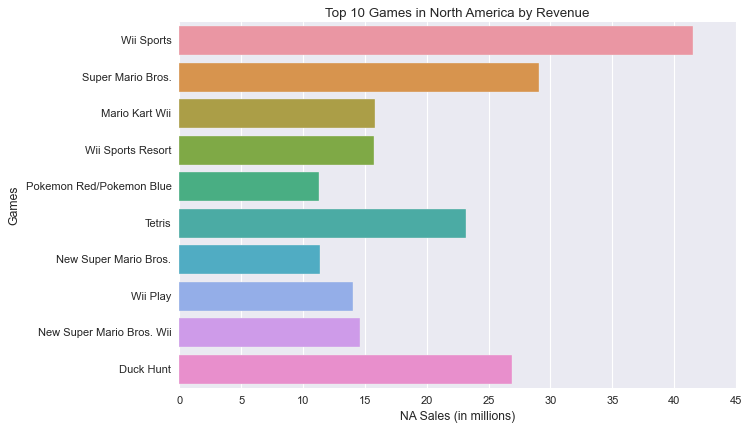

In [37]:
# Let's Plot the top 10 games in NA by revenue
plt.style.use("seaborn")
sns.barplot(x=top10na, y=top10gamesna)
plt.title("Top 10 Games in North America by Revenue")
plt.xlabel("NA Sales (in millions)")
plt.ylabel("Games")
plt.show()

In [38]:
# Make a list of Top-10 Games by revenue in European Union
top10eu = data['EU_Sales'][:10]
top10gameseu = []
for pr in top10eu:
    top10gameseu.append(data[data['EU_Sales'] == pr]['Name'].tolist()[0])

print(f"Top-10 Games by European Union Sales are:\n{top10gameseu}")

Top-10 Games by European Union Sales are:
['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt']


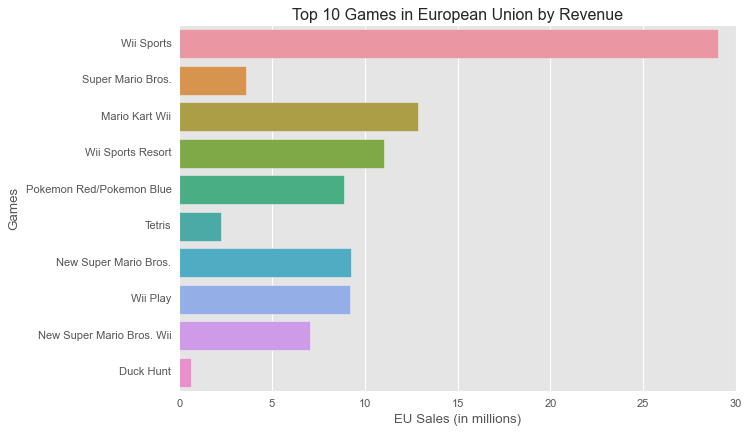

In [39]:
# Let's Plot the top 10 games in EU by revenue
plt.style.use("ggplot")
sns.barplot(x=top10eu, y=top10gameseu)
plt.title("Top 10 Games in European Union by Revenue")
plt.xlabel("EU Sales (in millions)")
plt.ylabel("Games")
plt.show()

## please upvote if you like this notebook
## leave your comments and suggestions below
![](http://cdn.lowgif.com/full/bfaa4f88b2b04bd7-thank-you-animated-gif-4-excel-design-technologies.gif)